<a href="https://colab.research.google.com/github/android-kunjapppan/Fast-AI/blob/master/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np

# Cross Validation :
  A technique which ensures that our model fits the data accurately adn also ensures that the model doesn't overfit.

# Overfitting:

In [13]:
df = pd.read_csv('/content/winequality-red.csv')

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
np.unique(df.quality)

array([3, 4, 5, 6, 7, 8])

**Mapping all Qualities from 0 to 5**

In [21]:
Quality_Mapping = {3:0,
                   4:1,
                   5:2,
                   6:3,
                   7:4,
                   8:5}

df.loc[:,"quality"] = df.quality.map(Quality_Mapping)

**Splitting data into train and test sets**

* Use sample with(frac =1) to shuffle the dataframe.
* resetting indices, so they change after Shuffling 




In [23]:
# To shuffle the data
df = df.sample(frac=1).reset_index(drop=True)

# Total length of dataframe is 1599 
# Training Set - 1000
df_train = df.head(1000)


# Testing Set
df_test = df.tail(599)

# Training a DecisionTree Model

In [24]:
from sklearn import tree
from sklearn import metrics

# Initializing decision Tree with max_depth = 3
clf = tree.DecisionTreeClassifier(max_depth=3)

**Choosing the colummn names that you want train ie., Features of the Model**

In [25]:
cols = ["fixed acidity",	"volatile acidity",	"citric acid",	"residual sugar",	"chlorides",	"free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol"]

**Training**

In [26]:
clf.fit(df_train[cols],df_train.quality)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Predicitons on Training Data**

In [27]:
train_pred = clf.predict(df_train[cols])

**Predictions on Test Data**

In [28]:
test_pred = clf.predict(df_test[cols])

**Calculating Accuracy**

In [29]:
train_acc = metrics.accuracy_score(df_train.quality,train_pred)

test_acc = metrics.accuracy_score(df_test.quality, test_pred)

print(f"train acc- {train_acc}--- test acc- {test_acc}")

train acc- 0.572--- test acc- 0.5759599332220368


**Now we'll look for max_depth = 7**


In [31]:
clf7 = tree.DecisionTreeClassifier(max_depth=7)

# Training
clf.fit(df_train[cols],df_train.quality)

# preditions on train & test data
train_pred = clf.predict(df_train[cols])
test_pred = clf.predict(df_test[cols])

# accuracies for train and test
train_acc = metrics.accuracy_score(df_train.quality,train_pred)
test_acc = metrics.accuracy_score(df_test.quality,test_pred)


train_acc,test_acc

(0.572, 0.5759599332220368)

# Now we'll calculate accuracies for different values of max-depth and make a plot

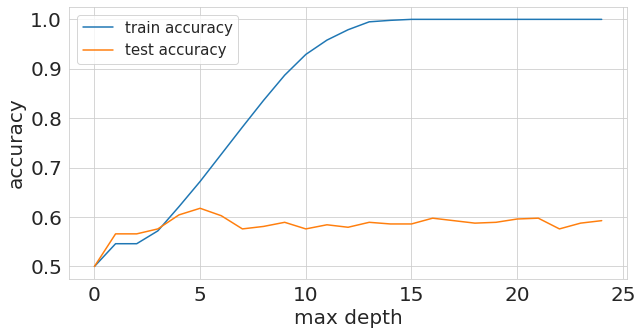

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn import metrics

matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)

# Initializin train and test acc to 50%  and we'll start plotting from 50%
train_acc = [0.5]
test_acc = [0.5]

# Iterating over few max_depth values
for depth in range(1,25):
  clf = tree.DecisionTreeClassifier(max_depth = depth)
  cols = ["fixed acidity",
          "volatile acidity",
          "citric acid",
          "residual sugar",
          "chlorides",
          "free sulfur dioxide",
          "total sulfur dioxide",
          "density",
          "pH",
          "sulphates",
          "alcohol"] 

  # fitting the Model
  clf.fit(df_train[cols],df_train.quality)

  # making Predictions
  train_pred = clf.predict(df_train[cols])
  test_pred = clf.predict(df_test[cols])

  # Calculate accuracies
  train_accuracy = metrics.accuracy_score(df_train.quality,train_pred)
  test_accuracy = metrics.accuracy_score(df_test.quality,test_pred)

  # appending accuracies
  train_acc.append(train_accuracy)
  test_acc.append(test_accuracy)


# Creating a plot
plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_acc,label = 'train accuracy')
plt.plot(test_acc,label = 'test accuracy')
plt.legend(loc='upper left',prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel('max depth',size = 20)
plt.ylabel('accuracy',size = 20)
plt.show()

* we can see that best test accuracys is obtained when max_depth is 5

* As we keep on incresing the depth the model keeps learing about the training data ad performs very poor on test data. This is called **Overfitting**
* This means the model doesn't generalize on unseen samples

* **Another Definition of Overfitting:** would be when the test loss increases as we keep improving the training loss


# Occum' razor principle"
    "Simplest Solutions are Most Generalizable Solutions"

# Choosing the Cross-Validation Techniques:
    Cross validation is divinding data into two parts. And the type of cross-validation depends on the dataset being used

* K-Fold Cross-Validation
* Stratified K-Fold Cross-Validation
* Hold-Out based Cross-Validation
* Leave-one-out Cross-Validation
* Group K-Fold Cross-Validation


# 1. K-Fold Cross Validation:
  Divide the data into k different subsets which are exclusive of each other


  **Code:**

In [3]:
import pandas as pd
from sklearn import model_selection

# Each sample is assigned with a values from 0 - (k-1) 

if __name__=="__main__":
  df = pd.read_csv('/content/winequality-red.csv')

  # we create a new col called 'kfold' and fill it with -1
  df['kfold']= -1

  # next step is to randomize the rows of the data
  df= df.sample(frac=1).reset_index(drop = True)

  # Initiate the KFold class from the model_selection module
  kf = model_selection.KFold(n_splits =5)

  # fill the new kfold column
  for fold,(train_,val_) in enumerate(kf.split(X=df)):
    df.loc[val_,'kfold'] = fold

  # Save the new csv with kfold column
  df.to_csv("train_folds.csv",index = False)

# 2. Stratified KFold Cross validation:
* if you have a skewed dataset for binary classification with 90% positive samples and 10% negative samples
* Stratified kfold keeps the ratio of labels in each fold constant
    So, in each fold you'll have same 90% positive and 10% negative samples.
* Just replace 'KFold' with 'StratifiedKFold' and in 'kf.split()' will specify target column in which we want to stratify


Let's look at the distribution of labels in the wine dataset

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'count')

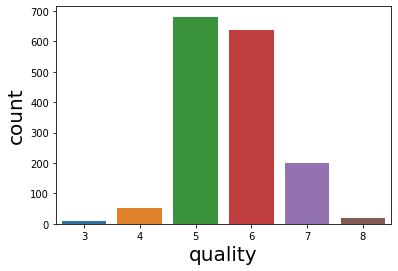

In [9]:
import seaborn as sns

b = sns.countplot(x='quality',data=df)
b.set_xlabel("quality",fontsize=20)
b.set_ylabel("count",fontsize=20)

* we can see that the data is much skewed. So we apply Stratified KFOld

In [7]:
import pandas as pd
from sklearn import model_selection

# Each sample is assigned with a values from 0 - (k-1) 

if __name__=="__main__":
  df = pd.read_csv('/content/winequality-red.csv')

  # we create a new col called 'kfold' and fill it with -1
  df['kfold']= -1

  # next step is to randomize the rows of the data
  df= df.sample(frac=1).reset_index(drop = True)

  # Fetch target values
  y = df.quality.values

  # Initiate the KFold class from the model_selection module
  kf = model_selection.StratifiedKFold(n_splits =5)

  # fill the new kfold column
  for fold,(train_,val_) in enumerate(kf.split(X=df,y=y)):
    df.loc[val_,'kfold'] = fold

  # Save the new csv with kfold column
  df.to_csv("train_stratified_folds.csv",index = False)

# 3. Hold-Out based validation:
* with time seried data

**Eg.,** To predict sales for 2020 and data is from 2015-2019.

  ```In this data, year 2019 is taken as holdout and from 2015-2018 are taken for training.
    While prediciting for 2020, we will include 2019 in the model, otherwise performance will be Subpar```

**Note:**
* **While dealing with small datasets;** 

  * Creating Big validation sets means losing a lot of data.
  * In these cases opt, KFold cross validation where k=N, n= No. of samples in the dataset.
  * Model wont be fast enough

# Now for regression:
* Mostly, simple KFold cross-validation works for regression problems.
* we can use all cross validation techniques discussed above for regression top, except Stratified KFold directly. However **if you see that the distribution of targets is not consistent, you can use Stratified KFold.**
* But there are ways to use Stratified KFold

**Using Stratified KFold for Regression**:
* first divide the target values into bins.
* Use **Sturge's Rule** to calcualte the appropriate number of bins.

    ```No. of bins = 1 + log2(N)```

    where, N is the no. of samples in the dataset

**Code:**

let's make a sample regression dataset and will apply Stratified KFold

In [13]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection


def create_folds(data):
  # create a new col called kfold and fill it with -1
  data['kfold'] = -1

  # the next step is to randomize the rows
  data = data.sample(frac=1).reset_index(drop=True)

  # calculate the number of folds using the sturge's rule
  # taking floor(), or round() both can be used
  num_bins = int(np.floor(1+np.log2(len(data))))

  # Bin targets
  data.loc[:,'bins'] = pd.cut(data['target'],bins = num_bins,labels=False)

  # initiate the StratifiedKFold
  kf = model_selection.StratifiedKFold(n_splits=5)

  # Fill the new kfold col
  # note: instead of targets we use bins
  for f_,(t_,v_) in enumerate(kf.split(X=data,y=data.bins.values)):
    data.loc[v_,'kfold'] = f_
  
  # drop the bins col
  data = data.drop('bins',axis =1)

  # return the dataframe with kfolds
  return data


if __name__=="__main__":
  X,y = datasets.make_regression(n_samples=15000,n_features =100, n_targets=1)

  # create a dataframe out of numpy arrays.
  df = pd.DataFrame(X, columns= [f"f_{i}" for i in range(X.shape[1])])
  df.loc[:,'target'] = y

  # Create Folds
  df = create_folds(df)

In [14]:
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,...,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,target,kfold
0,-0.407771,1.853832,0.817174,0.705439,-0.938482,0.787200,-0.535124,-0.282134,-1.688213,-0.705671,0.792797,-0.535890,-0.613685,0.126839,-0.943452,-1.534144,-1.348696,-0.658148,-0.279196,-1.342630,1.134930,-0.521173,1.617583,0.467771,-0.316797,0.557217,-0.931891,0.888148,0.446761,-0.320580,-1.173838,0.950617,-0.057040,-0.034340,1.584404,-0.342377,0.986705,-0.277723,-0.317005,-0.149624,...,0.540445,-1.635386,-0.716568,-0.613483,-0.164374,-0.673414,0.754285,-0.632647,-0.626481,-1.344580,0.635437,-0.331161,0.530890,-1.095504,1.879689,-0.135472,-2.104586,0.229777,1.828486,-0.128177,-0.713276,0.932449,-1.468037,-0.428374,-1.395362,0.141669,-0.775534,-0.510253,-0.397097,0.302548,-1.311036,1.451206,-0.462867,0.480959,0.427132,0.834041,0.119261,-0.831185,-97.090487,0
1,-1.045110,-0.780816,-1.896184,-0.263116,0.866498,1.481374,0.367045,-1.059599,-0.287083,0.406472,-0.805361,-1.371714,0.147444,0.176735,0.312556,0.075135,-0.265236,-0.518886,-0.174317,0.810340,-0.128449,1.191514,0.511302,0.280719,-1.049390,-3.307012,-0.314718,-0.513915,2.010118,-0.091076,-0.667846,0.173495,0.212770,0.572535,-0.559612,-0.549865,1.052941,0.990965,0.320720,-1.004092,...,-1.485948,0.149618,-0.122302,1.133957,0.492565,-0.546128,-1.154311,1.061502,-0.707945,-1.218458,0.629682,0.256734,-0.643712,1.137585,0.300593,-1.173228,1.863667,0.579937,0.251732,0.349206,-0.036390,-0.543824,0.799198,-0.471508,0.419021,-0.071828,-0.619944,-1.731687,-0.582760,-0.617000,-0.706096,-0.758654,1.532778,0.498678,-0.401066,0.032106,-0.271578,-0.102948,191.125209,0
2,1.281661,1.023085,-2.420375,-1.448678,-2.279434,0.504218,-0.678153,0.729077,1.142061,1.060473,-1.466988,-0.831386,-0.251393,-0.593047,0.217881,0.142215,-0.227509,-0.396890,-0.772086,0.778186,0.172473,0.254339,-0.042094,0.060022,-1.078862,-1.445184,-0.228496,-2.375428,-1.326182,0.216357,2.032233,-0.029432,1.783613,-0.751216,0.863587,-1.081383,0.917701,0.709331,0.459476,-1.810883,...,0.459059,0.833337,-1.119382,-0.275942,0.824842,0.284279,-0.006320,-0.629515,0.067394,0.628782,1.823294,-0.073714,1.896306,0.510681,0.588618,-0.387842,0.435176,-0.794076,-0.959938,-0.181808,0.612892,-0.304188,0.320417,0.315881,1.340657,-1.651540,0.862161,-0.586125,-0.316842,-0.306912,-0.288389,-0.126187,0.219549,-0.412205,-1.275966,0.773717,-0.190397,0.200078,-197.102906,0
3,0.492987,-1.272934,-0.494603,1.522784,1.229884,-0.420252,0.300699,-0.344888,-2.058742,0.186980,-1.037953,0.242480,0.634858,-2.476810,0.233632,0.319172,-1.812932,0.928848,0.417452,-0.333412,-1.428357,0.898368,0.826166,-1.779240,-0.468488,0.169796,-0.534090,0.006592,-0.784149,0.949077,-0.077654,1.082932,-0.181911,-0.083427,0.269021,0.212453,1.145233,-0.448457,-1.025249,-0.482618,...,0.319486,-0.015341,-1.241113,-0.136982,0.158671,-0.554631,1.391044,1.358722,-0.363400,-1.839061,-1.891041,0.189150,0.289063,0.557429,0.523830,-1.196978,1.436099,1.081657,0.568656,1.323300,-2.051281,0.863073,0.102275,-0.285448,-0.065170,0.081990,0.515510,-0.678459,-0.288121,0.826297,0.997922,1.824580,0.381194,-1.360678,0.006422,0.839903,0.856833,1.381235,-167.831568,0
4,-0.116938,-0.200806,-1.099751,1.962631,-0.204113,0.485187,0.871736,-0.264016,0.216324,1.401520,0.005096,-0.198429,0.585140,-1.304734,-0.216395,0.755767,0.961742,0.263035,-0.034990,-0.473552,0.503367,-1.734464,-0.635707,-0.307506,0.961598,0.510754,1.156157,-0.024514,1.145061,1.184364,0.054793,0.341878,-1.731594,-1.908478,-0.592228,0.281202,-0.173897,0.852218,1.624730,0.414269,...,-0.035821,-1.417388,-0.793508,-0.544610,-1.101611,-0.000241,-0.929259,-1.081029,3.069314,1.192077,0.821191,1.285369,1.258033,-0.916417,0.571291,-0.240127,0.552933,1.056

**If you have a good cross-validation scheme in which validation data is representative of training and real_world data, you'll be able to build a good machine learning model**

# Visualising the Cross-Validation Techniques:

In [15]:
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

**Visualize our data**

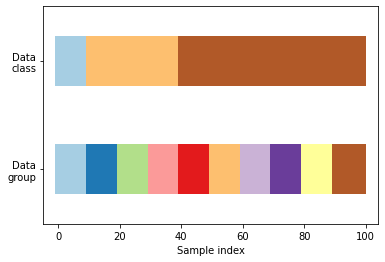

In [16]:
# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(range(len(groups)),  [.5] * len(groups), c=groups, marker='_',
               lw=50, cmap=cmap_data)
    ax.scatter(range(len(groups)),  [3.5] * len(groups), c=classes, marker='_',
               lw=50, cmap=cmap_data)
    ax.set(ylim=[-1, 5], yticks=[.5, 3.5],
           yticklabels=['Data\ngroup', 'Data\nclass'], xlabel="Sample index")


visualize_groups(y, groups, 'no groups')

**Defining a function to visualize Cross-validation Behaviour**

In [17]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

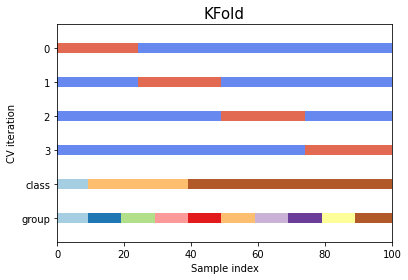

In [18]:
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

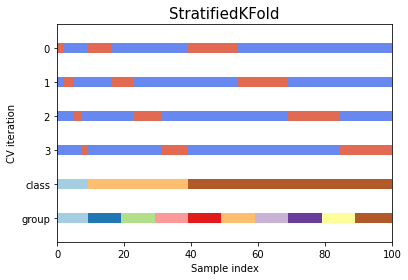

In [19]:
fig, ax = plt.subplots()
cv = StratifiedKFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

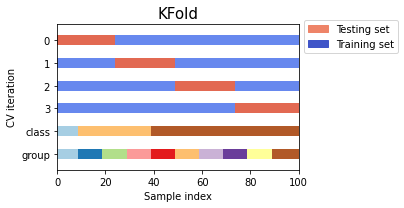

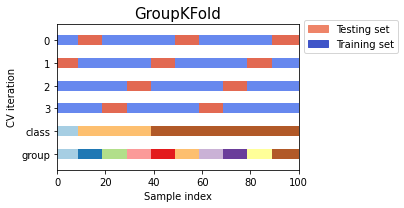

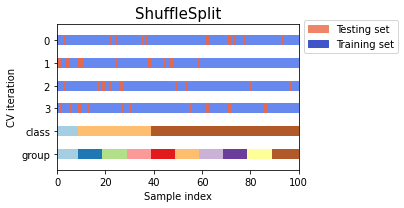

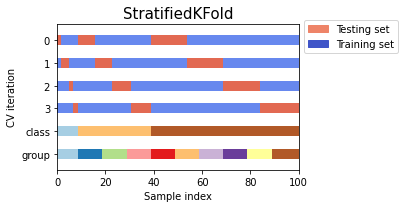

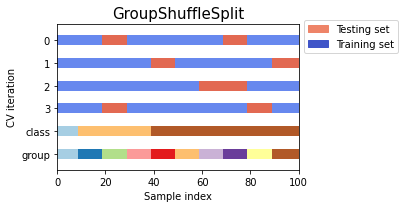

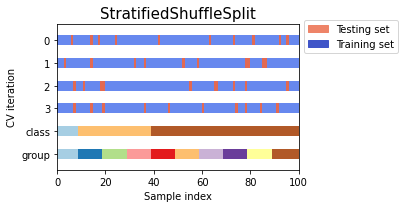

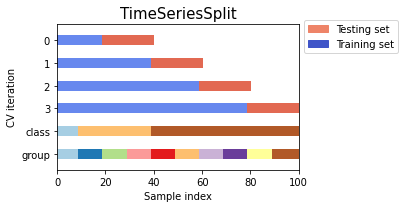

In [20]:
cvs = [KFold, GroupKFold, ShuffleSplit, StratifiedKFold,
       GroupShuffleSplit, StratifiedShuffleSplit, TimeSeriesSplit]


for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()